In this notebook, we would take a look at various time series data that are openly available.
Datasets chosen represent wide varity of interesting time series from things like weather dataset, air qulaity, sea surface temperature, global carbon dioxide, number of sun spots or some more economic and social indicator such as gdp of a country, foreign exchage rates of our currency, covid cases in a few countries, mortality rates . Visualization is the first step of exploratory data analysis, this is an important part to familiarize yourself with the kind of issues and trends which can find in the real world.


Some of the links to these datasets are available on the course webpage. The rest of the data used in plotting these figures in the notebook is available in the google drive folder.
The Course website is [here](https://tulasiramreddy.github.io/iiserp_time_series)

_If you encounter error, try running the cells starting from the specific dataset loading cell.
Different datasets have different keys, which are the unique column values speicifc to them._

In [39]:
# Some important library needed to plot and load data, we have used pandas, which makes indexing and sampling
# timeseries data easier
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 0.1
mpl.rcParams['lines.linestyle'] = '-'
mpl.rcParams['axes.labelsize']=18
mpl.rcParams['figure.figsize']=(12,6)
mpl.rcParams['lines.marker']='.'
mpl.rcParams['lines.markerfacecolor']='olive'
#mpl.rcParams['font.']
plt.xkcd()

import matplotlib.pyplot as plt
import pandas as pd

## AQI dataset of Pashan
**We load the air quality data of pashan, to look at the dominant pollutatnts such as co, particulate matter, NO2 and Ozone.**

In [40]:
# Load the air quality data from the CSV file
df = pd.read_csv('pashan_pune_india_aqi.csv',na_values=[' '])

# Get information about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2300 non-null   object 
 1    pm25   2251 non-null   float64
 2    pm10   2270 non-null   float64
 3    o3     2222 non-null   float64
 4    no2    1734 non-null   float64
 5    co     1831 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.9+ KB
None


In [41]:
# Print the first few rows of the DataFrame, alternatively, try 
#print(df.tail())
print(df.head())

        date   pm25   pm10    o3   no2     co
0  2021/10/1   22.0   28.0  32.0   7.0  104.0
1  2021/10/2   27.0   30.0  51.0  11.0   51.0
2  2021/10/3   32.0   30.0  51.0  12.0    NaN
3  2021/10/4   34.0   29.0  51.0  14.0    NaN
4  2021/10/5   31.0   26.0  50.0  13.0  104.0


There is a default indexing to the datasets. We want to index our data points by the date itself

In [42]:
#Setting the index as the datetime, extremely useful for many analysis
df['Datetime']=pd.to_datetime(df['date'])
df = df.set_index('Datetime')

# Delete the additional column 'date' now
df=df.drop(['date'],axis=1)

/home/shashank/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  after removing the cwd from sys.path.


<AxesSubplot:title={'center':'Pashan AQI for  pm10'}, xlabel='Datetime'>

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


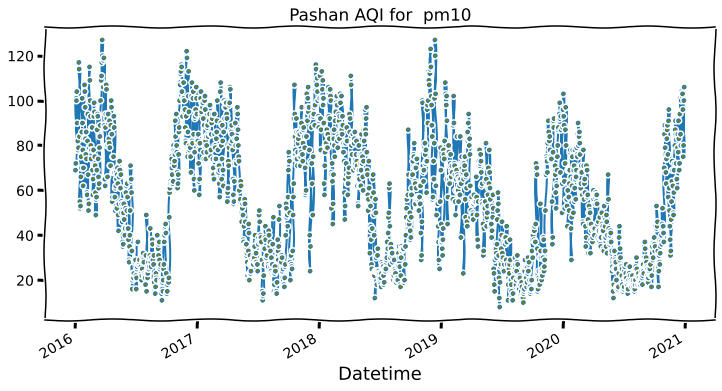

In [43]:
# plot the data now, over the years.... 
start_year,end_year=2015,2020
key=' pm10'
df[key]['{}-12-31'.format(start_year):'{}-12-31'.format(end_year)].plot(title='Pashan AQI for {}'.format(key))

**What do you observe about different constituents in the above? Do you see any trend and seasonality?**

### Annual Global Temperature from NASA
We now plot the change in global surface temperature from 1880 to 2020, assuming the mean is computed from 1951 to 1980. Only the deviations from this mean is computed. What are your observations about the trend? 

In [44]:
df=pd.read_csv('temp_land_ocean.txt',delim_whitespace=True)

# # Setting the index as the datetime, needed for many analysis
df['Datetime']=pd.to_datetime(df['Year'],format='%Y')
df = df.set_index('Datetime')

# Delete the additional two columns now
df=df.drop(['Year'],axis=1)

# Now inspect
df.head()

,No_Smoothing,Lowess(5)
Datetime,,
1880-01-01,-0.18,-0.10
1881-01-01,-0.09,-0.14
1882-01-01,-0.11,-0.17
1883-01-01,-0.17,-0.20
1884-01-01,-0.28,-0.24


<AxesSubplot:xlabel='Year', ylabel='Temperature'>

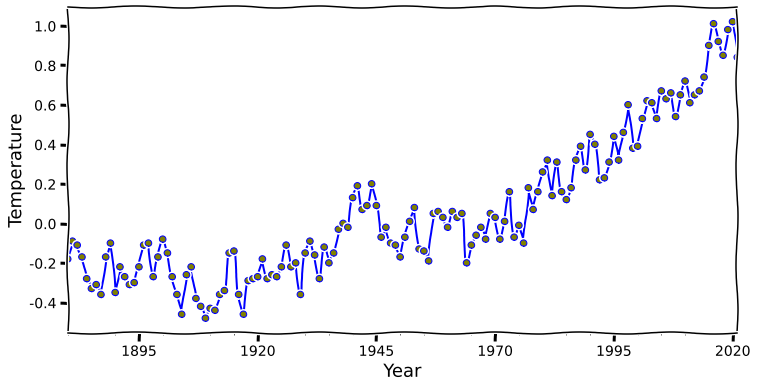

In [45]:
df['No_Smoothing'].plot(marker='o',xlabel='Year',ylabel='Temperature',c='b')
#df['Lowess(5)'].plot(figsize=(16,8),xlabel='Year',ylabel='CO2(parts per million)',c='r')

### Daily $CO_2$ data from an observatory in [Mauna Loa, Hawai, US](https://gml.noaa.gov/dv/data/index.php?parameter_name=Carbon%2BDioxide&type=Insitu&frequency=Daily%2BAverages)

The data is about the global CO2 concentration which is measured at various places in the world.
Plot the data below and see if you have seen it earlier. 
Understanding the data: [What do these measurements mean?](https://gml.noaa.gov/ccgg/about/co2_measurements.html)

In [46]:
df=pd.read_csv('co2_mm_mlo.txt',delim_whitespace=True)

# Delete the additional columns after reformatting data into required format 
df['Datetime'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
df=df.drop(['Year','Month','decimal_date','t','d','u'],axis=1)

# Setting the index as the datetime, needed for many analysis
df = df.set_index('Datetime')

# Now inspect
df.head()

,monthly_average,de-seasonalized
Datetime,,
1958-03-01,315.70,314.43
1958-04-01,317.45,315.16
1958-05-01,317.51,314.71
1958-06-01,317.24,315.14
1958-07-01,315.86,315.18


<AxesSubplot:xlabel='time', ylabel='CO2(parts per million)'>

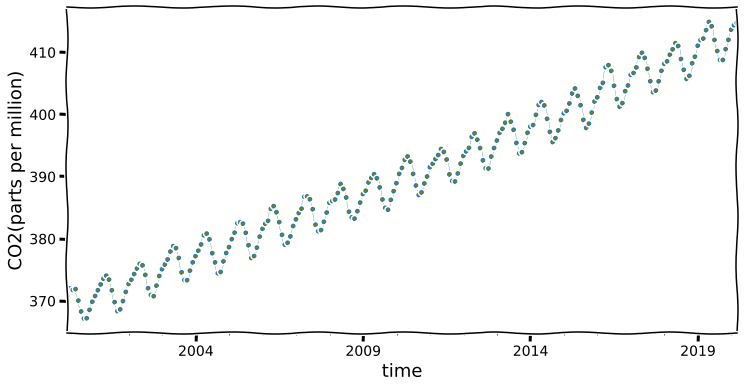

In [47]:
start_year,end_year=2000,2020
df['monthly_average']['{}-03-01'.format(start_year):'{}-03-01'.format(end_year)].plot(marker='.',lw=0.3,ylabel='CO2(parts per million)',xlabel='time',figsize=(12,6))

**What do you see, how many different features of a time series data you are able to identify from it?
Do you know the name of the special curve which comes from this data goes by?**

Methane, another major contributor to the global warming, we plot it's data also like CO2. 

In [49]:
df=pd.read_csv('ch4_mlo_surface-insitu_1_ccgg_MonthlyData.txt',delim_whitespace=True)
df.head()

,site_code,year,month,day,hour,minute,second,time_decimal,value,value_std_dev,nvalue,latitude,longitude,altitude,elevation,intake_height,qcflag
0,MLO,1987,1,1,0,0,0,1987.000000,-999.99,-99.99,0,19.536,-155.576,3437.0,3397.0,40.0,*..
1,MLO,1987,2,1,0,0,0,1987.084932,-999.99,-99.99,0,19.536,-155.576,3437.0,3397.0,40.0,*..
2,MLO,1987,3,1,0,0,0,1987.161644,-999.99,-99.99,0,19.536,-155.576,3437.0,3397.0,40.0,*..
3,MLO,1987,4,1,0,0,0,1987.246575,1697.19,11.82,27,19.536,-155.576,3437.0,3397.0,40.0,...
4,MLO,1987,5,1,0,0,0,1987.328767,1699.50,13.03,31,19.536,-155.576,3437.0,3397.0,40.0,...


In [50]:
# Delete the additional columns after reformatting data into required format 
df['Datetime'] = pd.to_datetime(df[['year', 'month','day']])
# Setting the index as the datetime, needed for many analysis
df = df.set_index('Datetime')
df.head()

df=df.drop(['year','month','time_decimal','day','hour','minute','latitude','longitude','altitude','elevation','intake_height','qcflag'],axis=1)

In [54]:
df.head()

,site_code,second,value,value_std_dev,nvalue
Datetime,,,,,
1987-01-01,MLO,0,-999.99,-99.99,0
1987-02-01,MLO,0,-999.99,-99.99,0
1987-03-01,MLO,0,-999.99,-99.99,0
1987-04-01,MLO,0,1697.19,11.82,27
1987-05-01,MLO,0,1699.50,13.03,31


<AxesSubplot:title={'center':'Methane'}, xlabel='Datetime'>

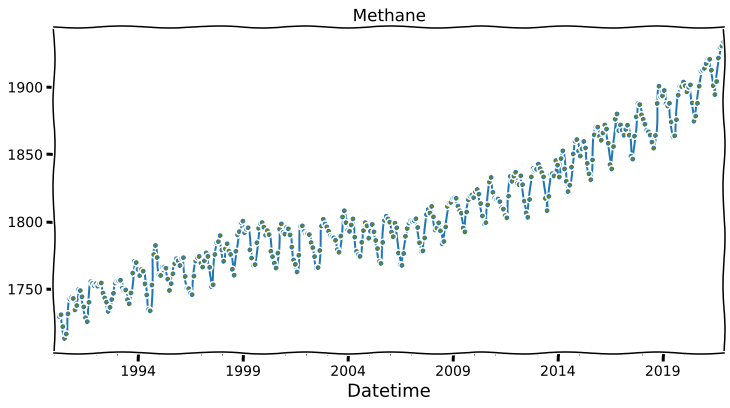

In [55]:
# We now plot from the year 1990
df['value']['1990-01-01':].plot(title='Methane')

### We now have Sea Surface Temperature (SST) data at a few locations from 1980 to 2018, where the records are availiable for daily mean temperatures. The mean temperature has been removed and only the deviations are presented.

In [56]:
df=pd.read_csv('SST_data.csv')
# Gives idea of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9618 entries, 0 to 9617
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dates   9618 non-null   object 
 1   s1      9618 non-null   float64
 2   s2      9618 non-null   float64
 3   s3      9618 non-null   float64
 4   s4      9618 non-null   float64
 5   s5      9618 non-null   float64
 6   s6      9618 non-null   float64
dtypes: float64(6), object(1)
memory usage: 526.1+ KB


In [57]:
# Setting the index as the datetime, needed for many analysis
df['Datetime']=pd.to_datetime(df['dates'])
df = df.set_index('Datetime')

# Delete the additional two columns now
df=df.drop(['dates'],axis=1)

# Now inspect
df.head()

,s1,s2,s3,s4,s5,s6
Datetime,,,,,,
1981-09-01,1.686270,-0.794102,1.148352,1.158114,2.024443,1.038107
1981-09-02,1.749894,-0.742321,1.016314,1.281761,2.149033,0.601557
1981-09-03,1.475208,-0.749156,0.936533,1.386429,2.176159,3.646527
1981-09-04,1.622190,-0.724582,0.938976,1.502116,2.345862,3.182967
1981-09-05,1.750866,-0.858571,0.993645,1.808782,2.388112,3.040866


<AxesSubplot:title={'center':'Station 1'}, xlabel='Datetime'>

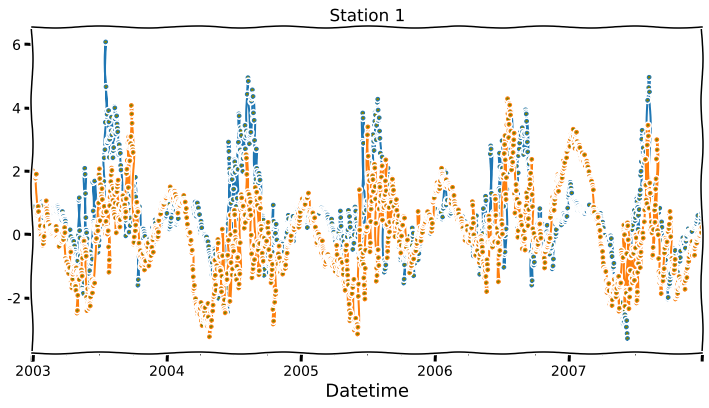

In [58]:
# plot the data now, over the years.... 
start_year,end_year=2002,2007
df['s4']['{}-12-31'.format(start_year):'{}-12-31'.format(end_year)].plot(marker='.',title='Station {}'.format(5))
df['s1']['{}-12-31'.format(start_year):'{}-12-31'.format(end_year)].plot(marker='.',title='Station {}'.format(1))

In [60]:
## Sunspot data obtained at monthly frequency

In [61]:
df= pd.read_csv('monthly-sunspots.csv' ,parse_dates=True,squeeze=True)

In [62]:
df.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [63]:
# Setting the index as the datetime, needed for many analysis
df['Datetime']=pd.to_datetime(df['Month'])
df = df.set_index('Datetime')

# Delete the additional two columns now
df=df.drop(['Month'],axis=1)

# Now inspect
df.head()

,Sunspots
Datetime,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0


<AxesSubplot:xlabel='time', ylabel='Monthly sunpot number'>

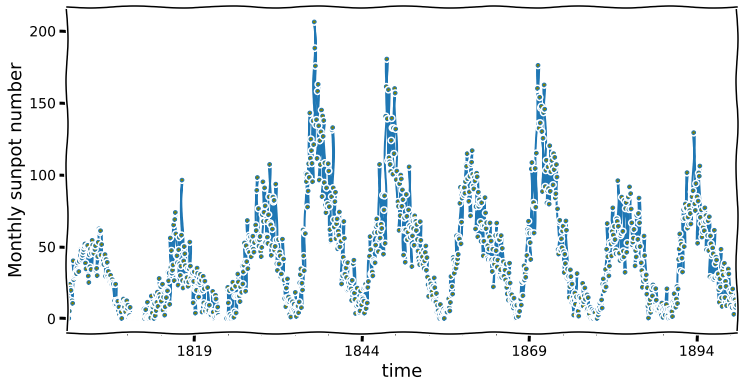

In [64]:
# data begins from 1749 to 1983 
df['Sunspots']['1800-01-01':'1900-01-01'].plot(ylabel='Monthly sunpot number',xlabel='time')

### We now plot the Exchange rate data of indian currency versus currency of US,UK,Europe and Japan

In [71]:
df=pd.read_csv('HBS_Table_No._215___Daily_Exchange_Rate_of_the_Indian_Rupee.txt',delimiter=r"\s+",na_values=[' ','-'])

In [72]:
# Setting the index as the datetime, needed for many analysis
df['Datetime']=pd.to_datetime(df['Date'])
df = df.set_index('Datetime')

# Delete the additional two columns now
df=df.drop(['Date'],axis=1)

# Now inspect
df.head()

,Dollar,Pound,Euro,Yen
Datetime,,,,
2022-12-23,82.8685,99.7654,87.9025,62.46
2022-12-22,82.6679,100.2470,88.0226,62.72
2022-12-21,82.7736,100.6693,87.8443,62.65
2022-12-20,82.7902,100.4466,87.7460,62.30
2022-12-19,82.6405,100.6473,87.7670,60.76


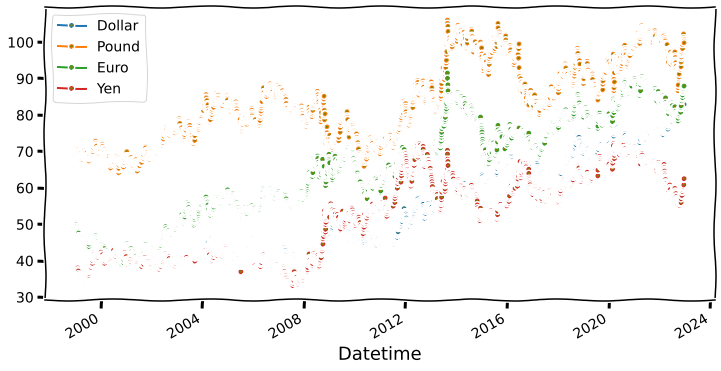

In [79]:
# data begins from 1749 to 1983 
#df[key] = pd.to_numeric(df[key])
keys=df.columns.tolist()

for key in keys:
    df[key].plot(marker='o',label=key,markersize=3)
plt.legend()